# Unit 5 - Financial Planning

In [25]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [26]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [27]:
# Set current amount of crypto assets
crypto_assets = {
    'BTC': 1.2,
    'ETH': 5.3
}


In [28]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [29]:
# Fetch current BTC price
requests.get(btc_url)

# Fetch current ETH price
requests.get(eth_url)

# Execute GET request and store response
response_BTC_Data = requests.get(btc_url)
response_ETH_Data = requests.get(eth_url)

# Use json function from json library to format
import json
response_BTC_Data.json()
response_ETH_Data.json()
BTC_Data = response_BTC_Data.json()
ETH_Data = response_ETH_Data.json()
#print(json.dumps(BTC_Data, indent=4))
#print(json.dumps(ETH_Data, indent=4))  make sure I can clearly see the key

# Compute current value of my crpto
btc_price = BTC_Data["data"]['1']['quotes']['CAD']['price']
eth_price = ETH_Data ['data']['1027']['quotes']['CAD']['price']

print(f"Current BTC Price: {btc_price} CAD")
print(f"Current ETH Price: {eth_price} CAD")

my_btc = crypto_assets['BTC']
my_eth = crypto_assets['ETH']
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

Current BTC Price: 35137.6025 CAD
Current ETH Price: 2359.63299 CAD


In [30]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42165.12
The current value of your 5.3 ETH is $12506.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [31]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [32]:

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
alpaca_api_key


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


'PKLB1VIGZNIK1FIX63MK'

In [33]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-06-09 04:00:00+00:00  102.07  102.22  101.97  102.05  5420517   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-06-09 04:00:00+00:00       17713  102.086353  409.34  411.74  401.44   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-09 04:00:00+00:00  401.44  85991523      577695  406.845749

In [39]:
shares = {
    'AGG': 200,
    'SPY': 50
}
# Pick AGG and SPY close prices

agg_close_price = df_portfolio["AGG"]["close"].iloc[0]
spy_close_price = df_portfolio["SPY"]["close"].iloc[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $102.05
Current SPY closing price: $401.44


In [40]:
# Compute the current value of shares
my_spy = shares["SPY"]
my_agg = shares["AGG"]
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20072.00
The current value of your 200 AGG shares is $20410.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 12000

# Calculate the total value of crypto assets
crypto_total_value = my_btc_value + my_eth_value

# Calculate the total value of shares
shares_total_value = my_spy_value + my_agg_value

# Create the df_savings DataFrame
df_savings = pd.DataFrame({'Amount': [crypto_total_value, shares_total_value]}, index=['Crypto', 'Shares'])




# Display the savings DataFrame
display(df_savings)

,Amount
Crypto,54671.177847
Shares,40482.000000


<Axes: title={'center': 'Portfolio Composition'}, ylabel='Amount'>

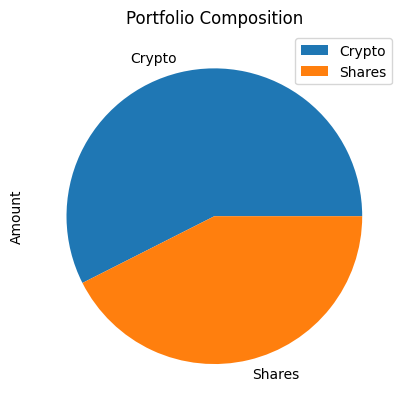

In [53]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Composition")

In [54]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Amount'].sum()

# Validate saving health
if total_savings >= emergency_fund:
    print("Congratulations! You have enough savings to cover the emergency fund.")
elif total_savings >= monthly_income:
    print("You have savings, but it is recommended to save more to reach the emergency fund goal.")
else:
    print("You need to save more to reach both your monthly income and emergency fund goals.")

Congratulations! You have enough savings to cover the emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")